<div style="border:solid green 2px; padding: 20px">

<b>Привет, Евгений! Поздравляю с выполнением очередного проекта!!</b>

Меня зовут Петр Раздобреев и я буду проверять твою работу. Попробую помочь сделать тебе её еще лучше! В Практикуме принято общени на ты, но если это дискомфортно, то сообщи об этом)

Ниже ты найдешь мои комментарии - пожалуйста, не перемещай, не изменяй и не удаляй их. Я буду использовать цветовую разметку:

<div class="alert alert-danger">
<b>Комментарий ревьюера:</b>☁️Так выделены самые важные замечания. Без их отработки проект не будет принят. </div>

<div class="alert alert-warning">
<b>Комментарий ревьюера:</b>⛅️ Так выделены небольшие замечания.Такие замечания в проекте допустимы, это пространство для улучшений в будущем.
</div>

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>☀️Так я выделяю успешные идеи.</div>

Давай работать над проектом в диалоге: если ты что-то меняешь в проекте или отвечаешь на мои комменатри — пиши об этом. Мне будет легче отследить изменения, если ты выделишь свои комментарии:
<div class="alert alert-info"> <b>Комментарий студента:</b> Например, вот так.</div>

Всё это поможет выполнить повторную проверку твоего проекта оперативнее. 
    

# Проект: Анализ сервиса аренды самокатов GoFast

Необходимо проанализировать данные и проверьте некоторые гипотезы, которые могут помочь бизнесу вырасти.
Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением. Сервисом можно пользоваться:

без подписки абонентская плата отсутствует;
- стоимость одной минуты поездки — 8 рублей;
- стоимость старта (начала поездки) — 50 рублей;

с подпиской Ultra абонентская плата — 199 рублей в месяц;
- стоимость одной минуты поездки — 6 рублей;
- стоимость старта — бесплатно.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st

Получим датасеты для анализа

In [2]:
users = pd.read_csv('https://code.s3.yandex.net/datasets/users_go.csv')
rides = pd.read_csv('https://code.s3.yandex.net/datasets/rides_go.csv')
subscriptions = pd.read_csv('https://code.s3.yandex.net/datasets/subscriptions_go.csv')

## Шаг 1. Загрузка данных

Ознакомимся с данными

In [3]:
users.info()
users.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra
5,6,Регина,25,Краснодар,ultra
6,7,Игорь,23,Омск,ultra
7,8,Юрий,23,Краснодар,ultra
8,9,Ян,21,Пятигорск,ultra
9,10,Валерий,18,Екатеринбург,ultra


In [4]:
rides.info()
rides.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28
5,1,2770.890808,16.650138,2021-10-09
6,1,3039.020292,14.927879,2021-10-19
7,1,2842.118050,23.117468,2021-11-06
8,1,3412.690668,15.238072,2021-11-14
9,1,748.690645,15.041884,2021-11-22


In [5]:
subscriptions.info()
subscriptions.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


<div class="alert alert-success">
<b>Комментарий ревьюера:</b>☀️
    
* Неважно в какой строке вызывать `info`, в любом случае результат будет выведен на экран и без `display`, а вот `head` без дополнительного `display` вывелется только в послежней строке, в связи с этим рекомендую поменять порядок `info` и `head`
    
* Кажется забавным писать несколько десятков слов, чтобы помочь сэкономить написания 9 символов)    
</div>

## Шаг 2. Предобработка данных

Приведем столбец date таблицы rides к типу даты pandas

In [6]:
rides['date'] = pd.to_datetime(
    rides['date'], format="%Y-%m-%d"
)

Добавим столбец с номером месяца

In [7]:
rides['month'] = rides['date'].dt.month

Посмотрим в каких полях содержаться пропущенные значения

In [8]:
users.isna().sum()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

In [9]:
rides.isna().sum()

user_id     0
distance    0
duration    0
date        0
month       0
dtype: int64

In [10]:
subscriptions.isna().sum()

subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

Пропущенные значения отсутствуют. Проверим наличие дубликатов. В таблице с поездками будем искать дубликаты по дистанции, значение довольно уникальное.

In [11]:
rides['distance'].value_counts()

741.545359     1
4158.226381    1
3672.118870    1
4533.004089    1
2437.274120    1
              ..
2949.530545    1
3289.893471    1
3047.554085    1
2931.718067    1
4031.935032    1
Name: distance, Length: 18068, dtype: int64

Видим, что все значения встречаются единожды, можем сделать вывод, что дубликатов нет.
В таблице с пользователями поищем дубликаты по идентификатору пользователя. Это значение должно быть уникально.

In [12]:
users['user_id'].value_counts()

209     2
807     2
611     2
43      2
737     2
       ..
520     1
519     1
518     1
517     1
1534    1
Name: user_id, Length: 1534, dtype: int64

Видим, что некторые значения встречаются дважды. Удалим повторяющиеся значения, оставим только первое вхождение.

In [13]:
users = users.drop_duplicates(subset=['user_id'], keep='first')

<div class="alert alert-warning">
<b>Комментарий ревьюера:</b>⛅️ 

Удаление дубликатов в этом датафрейме вижу, но выводы числа дубликатов хотелось бы видеть 
</div>

## Шаг 3. Исследовательский анализ данных

Проанализируем частоту встречаемости городов

Пятигорск         219
Екатеринбург      204
Ростов-на-Дону    198
Краснодар         193
Сочи              189
Омск              183
Тюмень            180
Москва            168
Name: city, dtype: int64


<AxesSubplot:title={'center':'Частота встречаемости городов'}, xlabel='Город', ylabel='Количество пользователей'>

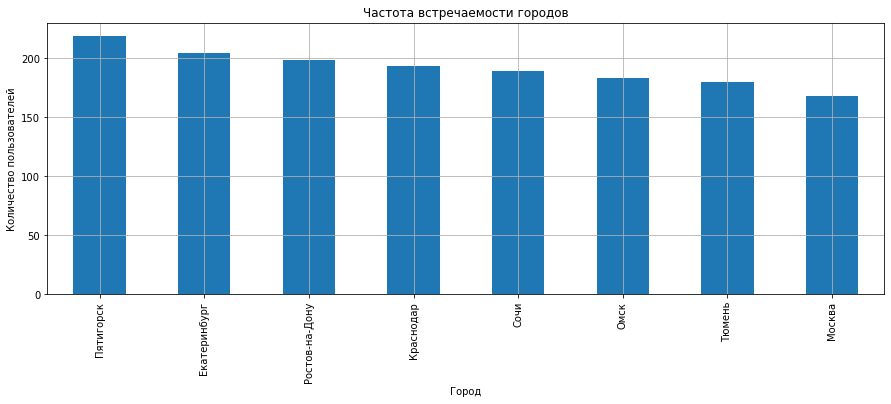

In [14]:
print(users['city'].value_counts())
users['city'].value_counts().plot(kind='bar', figsize=(15, 5), xlabel="Город", ylabel="Количество пользователей", grid=True, title='Частота встречаемости городов')

<div class="alert alert-success">
<b>Комментарий ревьюера v2:</b>☀️
   

Эти подписи важны и для дальнейших проектов, поэтому рекомендую не забывать об этих подписях 
</div>

<div class="alert alert-danger">
<b>Комментарий ревьюера:</b>☁️

* Прошу нанести на графики подписи осей, добавить заголовок
* И здесь хотелось видеть абсолютное число пользователей по городам численно, просто вывод `value_counts`

</div>

Наибольшее количество пользователей сосредоточено в Пятигорске, наименьшее в Москве.

Проанализируем соотношение пользователей с подпиской и без подписки

<AxesSubplot:ylabel='Типы подписок'>

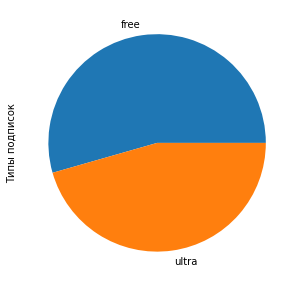

In [15]:
users['subscription_type'].value_counts().plot(kind='pie', figsize=(15, 5), ylabel='Типы подписок')

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>☀️
    
Рекомендовал бы круговую диаграмму для разнообразия добавить 

Количество пользователей без подписки больше

Посмотрим распределение возраста пользователей

Text(0, 0.5, 'Частота')

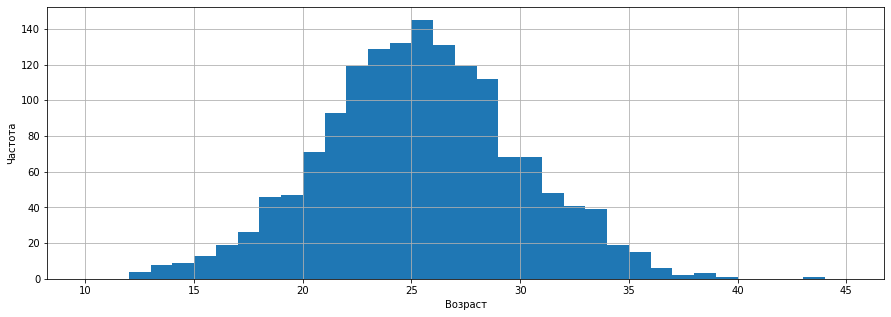

In [40]:
users['age'].hist(bins=35, figsize=(15, 5), range=(10, 45))
plt.xlabel('Возраст')
plt.ylabel('Частота')

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>☀️
    
Можно было бы диапазон чуть сузить 
    

По гистограмме можно сказать, что в основном пользуются сервисом пользователи от 12 до 40 лет. Большинство же пользователей в возрасте 25 лет.

Посмотрим влияет ли возраст на наличие подписки:

Text(0, 0.5, 'Частота')

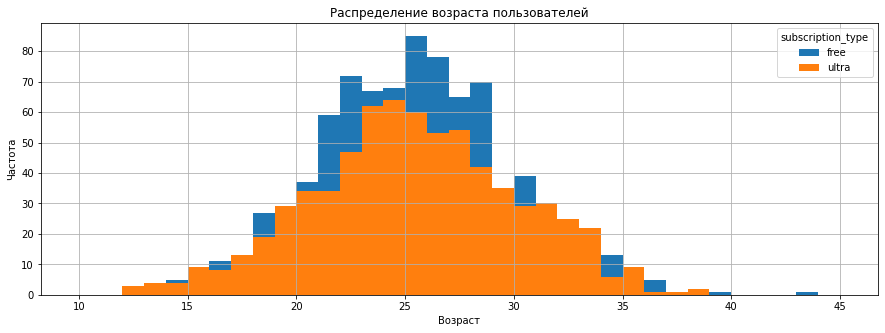

In [39]:
users.pivot(columns='subscription_type', values='age').plot.hist(bins=35, figsize=(15, 5), range=(10, 45), grid=True, title='Распределение возраста пользователей')
plt.xlabel('Возраст')
plt.ylabel('Частота')

Такой зависимости не обнаружено. Пользователи независимо от возраста одинаково пользуются подпиской.

Проанализируем расстояние, которое пользователи преодолевают за одну поездку

Text(0, 0.5, 'Частота')

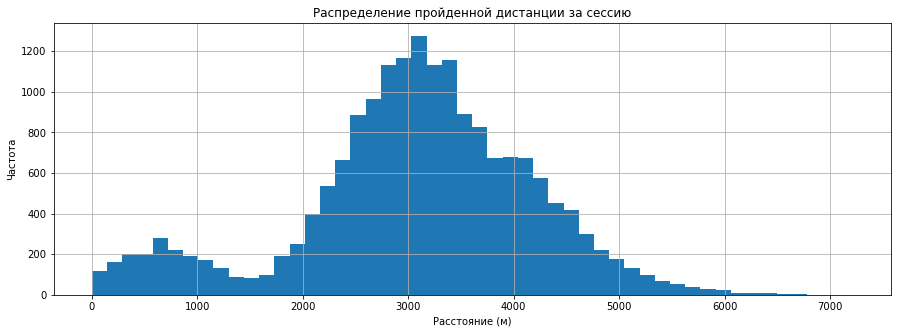

In [18]:
rides['distance'].plot.hist(bins=50, figsize=(15, 5), grid=True, title='Распределение пройденной дистанции за сессию')
plt.xlabel('Расстояние (м)')
plt.ylabel('Частота')

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>☀️
    
Наличие пары пиков дистанций наталкивает на мысль, что может быть несколько сценариев пользования приложением и с этими категориями стоит отдельно работать

Видим, что распределение имеет два колокола. Возможно это связано с разными группами пользователей, с подпиской и без. Проанализируем эту аномальность далее, когда будем объединять таблицы. А пока посмотрим продолжительность поездок

Text(0, 0.5, 'Частота')

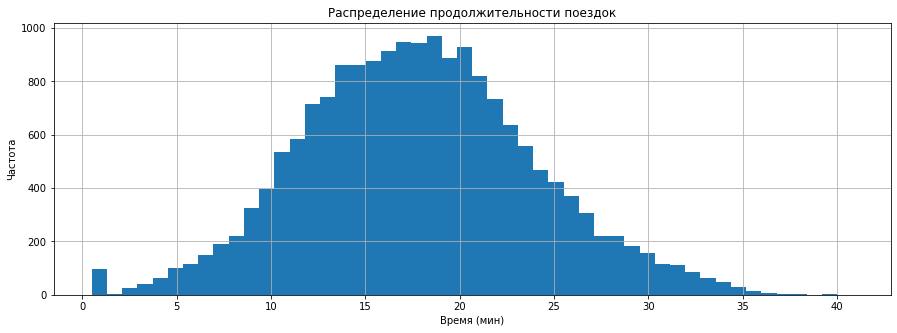

In [19]:
rides['duration'].plot.hist(bins=50, figsize=(15, 5), title='Распределение продолжительности поездок', grid=True)
plt.xlabel('Время (мин)')
plt.ylabel('Частота')

Распределение продолжительности поездки в отличии от расстояния имеет один колокол и форму, близкую к нормальному рачпределению, за исключением аномального выброса в начале. Можно предположить, что это связано с неисправными самокатами, когда пользователь завершает аренду в первую минуту, потому что самокат невозможно эксплуатировать. Посмотрим эти записи: 

In [20]:
rides[rides['duration'] < 1].head(10)

,user_id,distance,duration,date,month
6531,701,4196.445201,0.5,2021-08-31,8
6570,704,4830.824371,0.5,2021-10-14,10
6680,712,4684.004397,0.5,2021-03-04,3
6695,713,5215.642710,0.5,2021-02-25,2
6768,718,5197.436649,0.5,2021-02-11,2
6860,724,6225.520342,0.5,2021-12-16,12
6883,726,4452.491518,0.5,2021-03-01,3
7018,735,4406.954812,0.5,2021-04-13,4
7160,745,5286.167732,0.5,2021-08-17,8
7364,760,4881.391865,0.5,2021-08-29,8


<div class="alert alert-success">
<b>Комментарий ревьюера:</b>☀️
    
Отличнейшая находка, действительно такие короткие по времени поездки зачастую очень протяженные

In [21]:
rides[rides['duration'] < 1]['duration'].count()

95

Однако, сказать, что причиной этой аномалии стали неисправные самокаты нельзя, потому что расстояние этих поездок довольно велико. Поэтому, во избежание искажения, лучше записи с этими выбросами удалить.

In [22]:
rides.drop(rides[rides['duration'] < 1].index, inplace = True)

<div class="alert alert-warning">
<b>Комментарий ревьюера:</b>⛅️ 

Хорошая привычка промежуточный вывод писать 
</div>

## Шаг 4. Объединение данных

Объедините данные о пользователях, поездках и подписках в один датафрейм. Для этого воспользуйтесь методом merge()

In [23]:
df = rides.merge(users.merge(subscriptions, on='subscription_type'), on='user_id')

In [24]:
df.info()
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17973 entries, 0 to 17972
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            17973 non-null  int64         
 1   distance           17973 non-null  float64       
 2   duration           17973 non-null  float64       
 3   date               17973 non-null  datetime64[ns]
 4   month              17973 non-null  int64         
 5   name               17973 non-null  object        
 6   age                17973 non-null  int64         
 7   city               17973 non-null  object        
 8   subscription_type  17973 non-null  object        
 9   minute_price       17973 non-null  int64         
 10  start_ride_price   17973 non-null  int64         
 11  subscription_fee   17973 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(6), object(3)
memory usage: 1.8+ MB


user_id              0
distance             0
duration             0
date                 0
month                0
name                 0
age                  0
city                 0
subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

После объединения пропуски не появились, таблица соответствует ожиданиям.

Создайте ещё два датафрейма из датафрейма, созданного на предыдущем этапе:
- c данными о пользователях без подписки;
- с данными о пользователях с подпиской.

<div class="alert alert-danger">
<b>Комментарий ревьюера:</b>☁️

Прошу ещё добавить проверку, что после соединения таблиц не возникли пропуски, что размер объъединенной таблице соответствует ожиданиям

</div>

<div class="alert alert-success">
<b>Комментарий ревьюера v2:</b>☀️
   

Спасибо, всё в порядке, ещё пару проектов и потом можно будет использовать меньше проверок 
</div>

In [25]:
df_with_subscription = df[df['subscription_type'] == 'ultra']
df_without_subscription = df[df['subscription_type'] == 'free']

In [26]:
df_with_subscription.head(10)

,user_id,distance,duration,date,month,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
0,1,4409.919140,25.599769,2021-01-01,1,Кира,22,Тюмень,ultra,6,0,199
1,1,2617.592153,15.816871,2021-01-18,1,Кира,22,Тюмень,ultra,6,0,199
2,1,754.159807,6.232113,2021-04-20,4,Кира,22,Тюмень,ultra,6,0,199
3,1,2694.783254,18.511000,2021-08-11,8,Кира,22,Тюмень,ultra,6,0,199
4,1,4028.687306,26.265803,2021-08-28,8,Кира,22,Тюмень,ultra,6,0,199
5,1,2770.890808,16.650138,2021-10-09,10,Кира,22,Тюмень,ultra,6,0,199
6,1,3039.020292,14.927879,2021-10-19,10,Кира,22,Тюмень,ultra,6,0,199
7,1,2842.118050,23.117468,2021-11-06,11,Кира,22,Тюмень,ultra,6,0,199
8,1,3412.690668,15.238072,2021-11-14,11,Кира,22,Тюмень,ultra,6,0,199
9,1,748.690645,15.041884,2021-11-22,11,Кира,22,Тюмень,ultra,6,0,199


In [27]:
df_without_subscription.head(10)

,user_id,distance,duration,date,month,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
6500,700,2515.690719,14.944286,2021-01-02,1,Айдар,22,Омск,free,8,50,0
6501,700,846.932642,16.234663,2021-02-01,2,Айдар,22,Омск,free,8,50,0
6502,700,4004.434142,20.016628,2021-02-04,2,Айдар,22,Омск,free,8,50,0
6503,700,1205.911290,9.782872,2021-02-10,2,Айдар,22,Омск,free,8,50,0
6504,700,3047.379435,17.427673,2021-02-14,2,Айдар,22,Омск,free,8,50,0
6505,700,4342.002254,22.368009,2021-02-23,2,Айдар,22,Омск,free,8,50,0
6506,700,3798.334905,18.243756,2021-03-03,3,Айдар,22,Омск,free,8,50,0
6507,700,2984.551206,15.424899,2021-04-09,4,Айдар,22,Омск,free,8,50,0
6508,700,3360.107141,16.765497,2021-06-12,6,Айдар,22,Омск,free,8,50,0
6509,700,2567.543847,11.312160,2021-06-23,6,Айдар,22,Омск,free,8,50,0


Визуализируйте информацию о расстоянии и времени поездок для пользователей обеих категорий.

Text(0, 0.5, 'Частота')

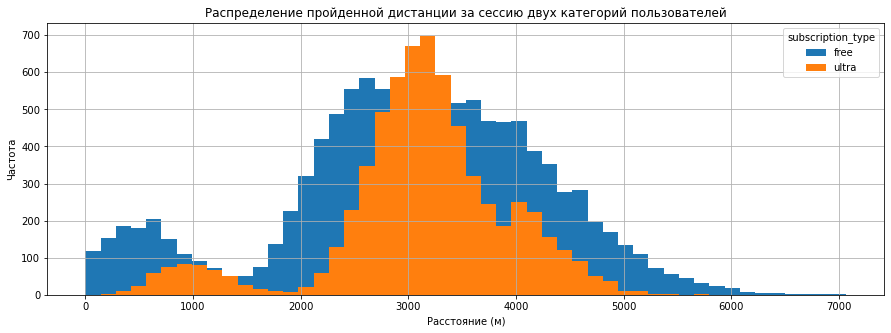

In [28]:
df.pivot(columns='subscription_type', values='distance').plot.hist(bins=50, figsize=(15, 5), grid=True)
plt.title('Распределение пройденной дистанции за сессию двух категорий пользователей')
plt.xlabel('Расстояние (м)')
plt.ylabel('Частота')

<div class="alert alert-danger">
<b>Комментарий ревьюера:</b>☁️

Здесь напомню о важности добавлять подписи осей, заголовок
</div>

Разделение на группы с подпиской и без не дало объяснения двух колоколов. Два колокола присутствуют в обоих группах. Можно предположить, что пользователи используют для двух целей, для того чтобы мобильно добраться до точки назначения и для прогулок. Вероятнее всего из-за этого мы и видим два колокола.

Text(0, 0.5, 'Частота')

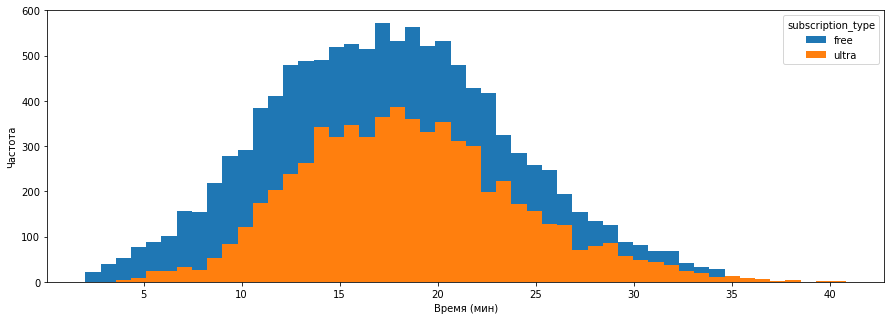

In [29]:
df.pivot(columns='subscription_type', values='duration').plot.hist(bins=50, figsize=(15, 5))
plt.xlabel('Время (мин)')
plt.ylabel('Частота')

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>☀️
    
* Отличное решение на одном графике отобразить тарифы
* На графиках отлично смотрится среднее или медиана, как дополнительное опорной значение, вот [тут](https://stackoverflow.com/questions/12043672/how-to-take-draw-an-average-line-for-a-scatter-plot) можно посмотреть, как добавить такую визуализацию

Форма распределения по времени в обоих группах схожа и близка нормальному 

## Шаг 5. Подсчёт выручки

Создадим датафрейм с агрегированными данными о поездках на основе датафрейма с объединёнными данными из шага 4

Найдем суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц.

In [30]:
# каждое значение из столбца duration округляется с помощью «потолка»: 
df['duration'] = np.ceil(df['duration']) 

agg_data = pd.pivot_table(df, index=('user_id', 'month'), values=('distance', 'duration', 'minute_price', 'start_ride_price', 'subscription_fee'), aggfunc=('sum', 'count', 'first'))

agg_data = agg_data.drop([
    ('distance', 'first'), 
    ('duration', 'count'), 
    ('duration', 'first'), 
    ('minute_price', 'count'),
    ('minute_price', 'sum'), 
    ('start_ride_price', 'count'),
    ('start_ride_price', 'sum'), 
    ('subscription_fee', 'count'),
    ('subscription_fee', 'sum')], axis=1)

agg_data.columns = ['count' ,'distance', 'duration', 'minute_price', 'start_ride_price', 'subscription_fee']

agg_data.head(10)

count      distance  duration  minute_price  start_ride_price  \
user_id month                                                                  
1       1          2   7027.511294      42.0             6                 0   
        4          1    754.159807       7.0             6                 0   
        8          2   6723.470560      46.0             6                 0   
        10         2   5809.911100      32.0             6                 0   
        11         3   7003.499363      56.0             6                 0   
        12         2   6751.629942      28.0             6                 0   
2       3          3  10187.723006      63.0             6                 0   
        4          2   6164.381824      40.0             6                 0   
        6          1   3255.338202      14.0             6                 0   
        7          2   6780.722964      48.0             6                 0   

               subscription_fee  
user_id month                    
1       1                   199  
        4                   199  
        8                   199  
        10                  199  
        11                  199  
        12                  199  
2       3                   199  
        4                   199  
        6                   199  
        7                   199

В этот же датафрейм добавим столбец с помесячной выручкой, которую принёс каждый пользователь

In [31]:
agg_data['proceeds'] = agg_data['start_ride_price'] * agg_data['count'] + agg_data['minute_price'] * agg_data['duration'] + agg_data['subscription_fee']

agg_data.head(10)

count      distance  duration  minute_price  start_ride_price  \
user_id month                                                                  
1       1          2   7027.511294      42.0             6                 0   
        4          1    754.159807       7.0             6                 0   
        8          2   6723.470560      46.0             6                 0   
        10         2   5809.911100      32.0             6                 0   
        11         3   7003.499363      56.0             6                 0   
        12         2   6751.629942      28.0             6                 0   
2       3          3  10187.723006      63.0             6                 0   
        4          2   6164.381824      40.0             6                 0   
        6          1   3255.338202      14.0             6                 0   
        7          2   6780.722964      48.0             6                 0   

               subscription_fee  proceeds  
user_id month                              
1       1                   199     451.0  
        4                   199     241.0  
        8                   199     475.0  
        10                  199     391.0  
        11                  199     535.0  
        12                  199     367.0  
2       3                   199     577.0  
        4                   199     439.0  
        6                   199     283.0  
        7                   199     487.0

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>☀️
    
Абсолютно верный расчёт доходов, можно двигаться к проверке гипотез

## Шаг 6. Проверка гипотез

#### Важно понять, тратят ли пользователи с подпиской больше времени на поездки? Если да, то пользователи с подпиской могут быть «выгоднее» для компании. Проверьте гипотезу. Используйте исходные данные о продолжительности каждой сессии — отдельно для подписчиков и тех, у кого нет подписки.

Для этого сформируем гипотезы:
- Нулевая гипотеза: средняя продолжительность сессий пользователей из двух групп равны.
- Альтернативная гипотеза: средняя продолжительность сессии с подпиской больше, чем средняя продолжительность сессии пользователей без подписки

Выборки достаточно большие и оснований думать, что дисперсии генеральных совокупностей разные, нет, поэтому можем сравнить средние t-тестом

In [32]:
alpha = 0.05 # уровень статистической значимости. если p-value окажется меньше него, отвергнем гипотезу

results = st.ttest_ind(df_with_subscription['duration'], df_without_subscription['duration'], alternative='greater')

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу') 

p-значение: 4.7044680744539e-28
Отвергаем нулевую гипотезу


<div class="alert alert-success">
<b>Комментарий ревьюера:</b>☀️
    
Отлично, что формулируешь нулевую, альтернативную гипотезу, это важно, выводы верны, ещё могу порекомендовать дополнительно проверять себя и выводить среднее проверяемых переменных или распределения

P-Value получилось очень маленькое, поэтому отвергаем нулевую гипотезу в пользу альтернативной, это значит, что средняя продолжительность сессии пользователей с подпиской больше, чем средняя продолжительность сессии пользователей без подписки

#### Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров? Проверьте гипотезу и сделайте выводы.

Для этого сформируем гипотезы:
- Нулевая гипотеза: расстояние одной поездки в 3130 метров.
- Альтернативная гипотеза: среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, превышает 3130 метров

In [44]:
ride_distance = 3130

alpha = 0.05 # уровень статистической значимости

results = st.ttest_1samp(
    df_with_subscription['distance'], 
    ride_distance,
      alternative='greater')

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу') 

p-значение: 0.9195368847849785
Не отвергаем нулевую гипотезу


<div class="alert alert-warning">
<b>Комментарий ревьюера:</b>⛅️ 

Бизнесу критичнее узнать больше ли 3130 пробег, поэтому лучше использовать другую альтернативную гипотезу
</div>

p-value получилось достаточно большое, чтобы не отвергать нулевую гипотезу. Можно сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров.

#### Проверьте гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. Сделайте вывод

Для этого сформируем гипотезы:
- Нулевая гипотеза: помесячная выручка от пользователей по месяцам из двух групп равны.
- Альтернативная гипотеза: помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки

In [45]:
alpha = 0.05 # уровень статистической значимости. если p-value окажется меньше него, отвергнем гипотезу

results = st.ttest_ind(agg_data[agg_data['subscription_fee'] > 0]['proceeds'], agg_data[agg_data['subscription_fee'] == 0]['proceeds'], alternative='greater')

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу') 

p-значение: 2.0314113674863288e-30
Отвергаем нулевую гипотезу


<div class="alert alert-success">
<b>Комментарий ревьюера:</b>☀️
    
Благодарю за дополнительный вывод графика

P-Value получилось очень маленькое, поэтому отвергаем нулевую гипотезу в пользу альтернативной, это значит, что помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки

Text(0, 0.5, 'Частота')

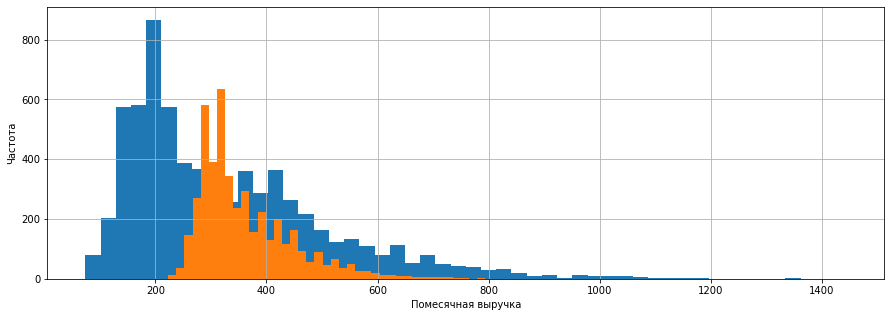

In [41]:
agg_data[agg_data['subscription_fee'] == 0]['proceeds'].hist(bins=50, figsize=(15, 5))
agg_data[agg_data['subscription_fee'] > 0]['proceeds'].hist(bins=50, figsize=(15, 5))
plt.xlabel('Помесячная выручка')
plt.ylabel('Частота')

#### Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?

Выборки в этом случае будут зависимыми. Чтобы проверить гипотезу о равенстве среднего генеральной совокупности для зависимых (парных) выборок в Python, применяют метод scipy.stats.ttest_rel().

<div class="alert alert-warning">
<b>Комментарий ревьюера:</b>⛅️ 

А какую альтернативную гипотезу выберешь?
</div>

Думаю, что нулевая гипотеза здесь будет что количество обращений не изменилось. А альтернативная как раз, что количество обращений снизилось.

## Вывод
1. Были выгружены датасеты:
- Пользователи - 1565 записей
- Сессии аренды самокатов - 18068 записей
- Типы подписок - 2 записи
2. В ходе анализа датасета был выявлен ряд проблем:
- Неправильный тип данных в поле даты
- Дубликаты пользователей
- Аномальное значение длительности аренды величиной 0.5 минуты. Таких записей было не много, было принято решение их удалить
3. После устранения указанных проблем, были изучены и отмечены следующие особенности в данных:
- средняя продолжительность сессии пользователей с подпиской больше, чем средняя продолжительность сессии пользователей без подписки
- среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров.
- помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>☀️
    
Отличный вывод, прошу чуть поработать с оформлением графиков и приму проект)

###### Спасибо за ревью!
🙂

<div class="alert alert-success">
<b>Комментарий ревьюера v2:</b>☀️
   
Благодарю за совместную работу и желаю успехов далее!

</div>